<a href="https://colab.research.google.com/github/nuri35/bby261FinalProjesi/blob/master/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

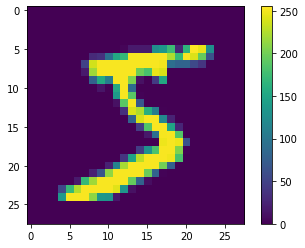

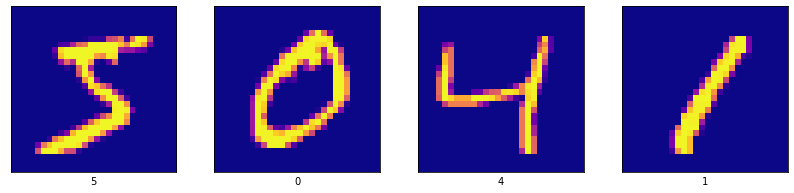

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_87 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 16s 268us/sample - loss: 0.1991 - accuracy: 0.9414 - val_loss: 0.1002 - val_accuracy: 0.9700
Epoch 2/2
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0890 - accuracy: 0.9741 - val_loss: 0.0928 - val_accuracy: 0.9730
Test loss: 0.09280733875397

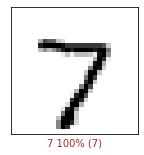

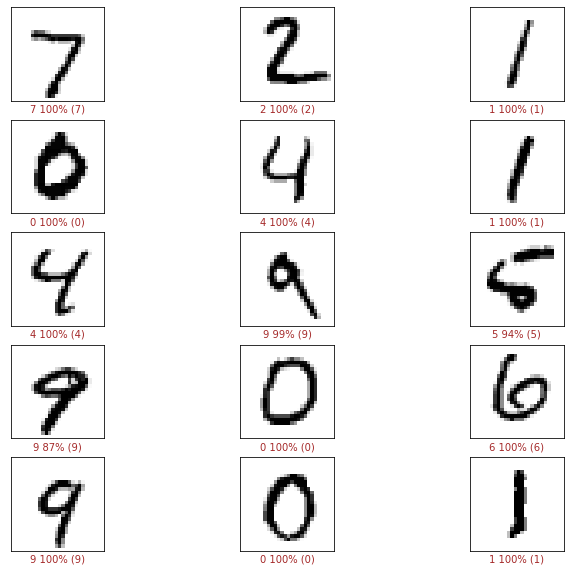

In [108]:

try:
  # kutuphaneleri eklıyoruz 
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


mnist = mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

el_yazisi = [
               '0', 
              '1', 
               '2',
               '3', 
              '4',
               '5',
               '6', 
               '7',
               '8', 
               '9']
X_train.shape

len(y_train)

y_train

X_test.shape

len(y_test)
import matplotlib.pyplot as plt


plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# El yazısı Şeklinde Grafiği göster
plt.show()

X_train = X_train / 255.0

X_test = X_test / 255.0

plt.figure(figsize=(14,14))
for i in range(4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='plasma', interpolation='nearest')
    plt.xlabel(el_yazisi[y_train[i]])
    
plt.show()


trainY =(y_train,10)
testY = (y_test,10)
        
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
                          
                          
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])                         
model.summary()


model.fit(X_train, y_train,
          epochs=2,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result_tahmin = model.predict(X_test)
result_tahmin[0]

np.argmax(result_tahmin[0])

y_test[0]

def plot(samples):
    width = min(12,int(np.sqrt(len(samples))))
    fig = plt.figure(figsize=(width, width))
    gs = gridspec.GridSpec(width, width)
    gs.update(wspace=0.05, hspace=0.05)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='plasma', interpolation='nearest')
    for ind, sample in enumerate(samples):
        if ind >= width*width:
            break
        ax = plt.subplot(gs[ind])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        sample = sample * 0.5 + 0.5
        sample = np.transpose(sample, (1, 2, 0))
        plt.imshow(cmap='plasma', interpolation='nearest')
i = 0
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plot_image(i, result_tahmin[i], y_test, X_test)


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, result_tahmin[i], y_test, X_test)

  



img = X_test[1]

print(img.shape)


img = (np.expand_dims(img,0))
print(img.shape)